In [2]:
from pymongo import MongoClient
import pprint

# connect to MongoDB
client = MongoClient(port=21000)

# use database db
db = client.db

# create a new collection 'rusrecords'
coll = db['drug_bank']

In [7]:
N = 0
N_interactions = 0
interactions = dict()
for doc in coll.find():
    if (doc['drug-interactions'] is not None and len(doc['drug-interactions']) > 0):
        N_interactions += 1
        interactions[doc['Drugname']] = doc['drug-interactions']
    N += 1

print(str(N_interactions)+'/'+str(N)+' drugs in drugbank.ca have listed interactions.')

1474/8206 drugs in drugbank.ca have listed interactions.


In [8]:
pprint.pprint(interactions['Imidafenacin'])

{'drug-interaction': [{'description': 'The serum concentration of Imidafenacin '
                                      'can be increased when it is combined '
                                      'with Atazanavir.',
                       'drugbank-id': 'DB01072',
                       'name': 'Atazanavir'},
                      {'description': 'The serum concentration of Imidafenacin '
                                      'can be increased when it is combined '
                                      'with Boceprevir.',
                       'drugbank-id': 'DB08873',
                       'name': 'Boceprevir'},
                      {'description': 'The serum concentration of Imidafenacin '
                                      'can be increased when it is combined '
                                      'with Ceritinib.',
                       'drugbank-id': 'DB09063',
                       'name': 'Ceritinib'},
                      {'description': 'The serum concentration of 

In [9]:
pprint.pprint(interactions['Metformin'])

{'drug-interaction': [{'description': 'The risk or severity of adverse effects '
                                      'can be increased when Acetazolamide is '
                                      'combined with Metformin.',
                       'drugbank-id': 'DB00819',
                       'name': 'Acetazolamide'},
                      {'description': 'Acetylsalicylic acid may increase the '
                                      'hypoglycemic activities of Metformin.',
                       'drugbank-id': 'DB00945',
                       'name': 'Acetylsalicylic acid'},
                      {'description': 'The risk or severity of adverse effects '
                                      'can be increased when Aldesleukin is '
                                      'combined with Metformin.',
                       'drugbank-id': 'DB00041',
                       'name': 'Aldesleukin'},
                      {'description': 'Ardeparin may increase the hyperkalemic '
          

                       'drugbank-id': 'DB01268',
                       'name': 'Sunitinib'},
                      {'description': 'The therapeutic efficacy of Metformin '
                                      'can be decreased when used in '
                                      'combination with Tacrolimus.',
                       'drugbank-id': 'DB00864',
                       'name': 'Tacrolimus'},
                      {'description': 'The therapeutic efficacy of Metformin '
                                      'can be decreased when used in '
                                      'combination with Temsirolimus.',
                       'drugbank-id': 'DB06287',
                       'name': 'Temsirolimus'},
                      {'description': 'Testosterone may increase the '
                                      'hypoglycemic activities of Metformin.',
                       'drugbank-id': 'DB00624',
                       'name': 'Testosterone'},
                      {'d

In [45]:
from pandas import read_csv
twosides = read_csv('3003377s-twosides.tsv', delimiter="\t")
#print(twosides.describe())
twosides.head()

,stitch_id1,stitch_id2,drug1,drug2,event_umls_id,event_name,proportional_reporting_ratio,pvalue,confidence,drug1_prr,drug2_prr,observed,expected
0,CID000000085,CID000000206,carnitine,galactose,C0004623,Bacterial infection,69.946875,1.877449e-322,5,14.7692307692308,6.65499999993345,0.2487,0.003556
1,CID000000085,CID000000206,carnitine,galactose,C0015967,body temperature increased,1.906807,5.407851e-54,3,\N,\N,0.1189,0.062356
2,CID000000085,CID000000206,carnitine,galactose,C0018932,haematochezia,72.510000,9.188845e-307,5,6.42696629213483,\N,0.2417,0.003333
3,CID000000085,CID000000206,carnitine,galactose,C0020433,Bilirubinaemia,32.095775,0.000000e+00,5,5.74576271186441,2.67678018575271,0.2532,0.007889
4,CID000000085,CID000000206,carnitine,galactose,C0022346,icterus,27.000000,1.924980e-312,5,6.52173913043478,\N,0.2574,0.009533


In [153]:
twosides[(twosides['drug1'] == 'metformin') ].head() 

,stitch_id1,stitch_id2,drug1,drug2,event_umls_id,event_name,proportional_reporting_ratio,pvalue,confidence,drug1_prr,drug2_prr,observed,expected
2859095,CID000004091,CID000004095,metformin,methadone,C0001122,Acidosis,11.857468,1.027073e-214,5,6.16205008085015,2.64994918700534,0.1662,0.014016
2859096,CID000004091,CID000004095,metformin,methadone,C0008031,chest pain,5.438159,1.494584e-183,5,\N,\N,0.1723,0.031684
2859097,CID000004091,CID000004095,metformin,methadone,C0009676,confusion,7.307856,6.912949e-201,5,\N,\N,0.1700,0.023263
2859098,CID000004091,CID000004095,metformin,methadone,C0011849,Diabetes,12.163149,6.457492e-217,5,2.14023017637327,\N,0.1659,0.013640
2859099,CID000004091,CID000004095,metformin,methadone,C0013221,drug toxicity NOS,18.439586,1.770517e-243,5,\N,2.61966044145076,0.1724,0.009349


In [155]:
twosides[(twosides['drug1'] == 'metformin')]['drug2'].value_counts()

ranitidine                  389
nitroglycerin               356
oxycodone                   333
rofecoxib                   333
prednisone                  332
fluticasone                 332
venlafaxine                 330
olanzapine                  303
paroxetine                  290
zolpidem                    282
KCl                         280
omeprazole                  259
simvastatin                 259
ofloxacin                   259
isosorbide-5-mononitrate    258
risperidone                 249
sildenafil                  246
quinapril                   246
quetiapine                  240
pravastatin                 237
tramadol                    234
sertraline                  232
warfarin                    229
spironolactone              229
pioglitazone                228
pantoprazole                220
valdecoxib                  220
temazepam                   216
metoclopramide              216
tamsulosin                  216
                           ... 
O-desmet

In [193]:
def check_interaction(drug1, drug2):
    if twosides[(twosides['drug1'] == drug1) & (twosides['drug2'] == drug2) | 
         (twosides['drug2'] == drug1) & (twosides['drug1'] == drug2)].empty:
        result = None
    else:
        twosides_subset = twosides[(twosides['drug1'] == drug1) & (twosides['drug2'] == drug2) | 
         (twosides['drug2'] == drug1) & (twosides['drug1'] == drug2)]
        twosides_subset = twosides_subset.sort_values('proportional_reporting_ratio', ascending=False)
        dct = dict(zip( twosides_subset['event_umls_id'], twosides_subset['proportional_reporting_ratio'].round(2) ))
        #result = 1
        result = dct
        
    return result

In [59]:
list(interactions.keys())[0:2]

['Porfimer', 'Phenmetrazine']

In [49]:
len(interactions.keys())

1474

In [229]:
import pandas as pd
###Variant 2
### Make dct of interactions as {drug1:{drug2:[description, {'event_umls_id':'proportional_reporting_ratio'}] }}
dct_interact={}
#for drug1_dbank in list(interactions.keys())[0:2]:
for drug1_dbank in ['Metformin']:    
    print(len(interactions[drug1_dbank]['drug-interaction']))
    drug1 = drug1_dbank.lower()
    dct_drug1_interactions={}
    for dct_drug2_dbank in interactions[drug1_dbank]['drug-interaction']:
        drug2_dbank = dct_drug2_dbank['name']
        drug2 = drug2_dbank.lower()
        description = dct_drug2_dbank['description']
        dct_drug1_interactions[drug2] = [description , check_interaction(drug1, drug2)]
        print(drug1, drug2, description)
    dct_interact[drug1] = dct_drug1_interactions

163
metformin acetazolamide The risk or severity of adverse effects can be increased when Acetazolamide is combined with Metformin.
metformin acetylsalicylic acid Acetylsalicylic acid may increase the hypoglycemic activities of Metformin.
metformin aldesleukin The risk or severity of adverse effects can be increased when Aldesleukin is combined with Metformin.
metformin ardeparin Ardeparin may increase the hyperkalemic activities of Metformin.
metformin aripiprazole The therapeutic efficacy of Metformin can be decreased when used in combination with Aripiprazole.
metformin arsenic trioxide The therapeutic efficacy of Metformin can be decreased when used in combination with Arsenic trioxide.
metformin articaine The therapeutic efficacy of Metformin can be decreased when used in combination with Articaine.
metformin asenapine The therapeutic efficacy of Metformin can be decreased when used in combination with Asenapine.
metformin atazanavir The therapeutic efficacy of Metformin can be de

metformin tolbutamide Metformin may increase the hypoglycemic activities of Tolbutamide.
metformin topiramate The risk or severity of adverse effects can be increased when Topiramate is combined with Metformin.
metformin torasemide The therapeutic efficacy of Metformin can be decreased when used in combination with Torasemide.
metformin tranylcypromine Tranylcypromine may increase the hypoglycemic activities of Metformin.
metformin triamcinolone The therapeutic efficacy of Metformin can be decreased when used in combination with Triamcinolone.
metformin triamterene Metformin may increase the hyperkalemic activities of Triamterene.
metformin trichlormethiazide The therapeutic efficacy of Metformin can be decreased when used in combination with Trichlormethiazide.
metformin trimethoprim The serum concentration of Metformin can be increased when it is combined with Trimethoprim.
metformin triptorelin The therapeutic efficacy of Metformin can be decreased when used in combination with Trip

In [230]:
#Drug1 Class
lst_drug1_class=['metformin']
#Check which drugs from this class have frank AE by interacting with Drug1 
lst_drug2_class=['acetazolamide','aripiprazole','atazanavir','jhgj','metformin','acetylsalicylic acid']

In [245]:
def getdf_AE_drug1_drug2(drug1,drug2):
    if (dct_interact[drug1][drug2][1] is not None):
        dct_AE_drug1_drug2 = dct_interact[drug1][drug2][1]

        df_AE_drug1_drug2 = pd.DataFrame()
        df_AE_drug1_drug2['event_umls_id'] = dct_AE_drug1_drug2.keys()
        df_AE_drug1_drug2['proportional_reporting_ratio'] = dct_AE_drug1_drug2.values()
        df_AE_drug1_drug2 = df_AE_drug1_drug2.sort_values(['proportional_reporting_ratio'], ascending=False)
        print('AE: ', drug2 + ' and ' + drug1 + ' interact and have reported AE associated with its interaction')
        return df_AE_drug1_drug2
    else:
        print('AE: ',drug2 + ' and ' + drug1 + ' interact and have no reported AE associated with its interaction ' ) 
        return None

Drug1:  metformin
Drug2:  acetazolamide
Interaction:  The risk or severity of adverse effects can be increased when Acetazolamide is combined with Metformin.
AE:  acetazolamide and metformin interact and have reported AE associated with its interaction
   event_umls_id  proportional_reporting_ratio
29      C0004626                        245.54
20      C0149512                        245.39
30      C0020440                        222.46
33      C0018418                        170.13
3       C0031046                        145.99

Drug1:  metformin
Drug2:  aripiprazole
Interaction:  The therapeutic efficacy of Metformin can be decreased when used in combination with Aripiprazole.
AE:  aripiprazole and metformin interact and have reported AE associated with its interaction
    event_umls_id  proportional_reporting_ratio
156      C0020619                        292.37
39       C0040456                        238.07
122      C0149707                        199.80
34       C0156215         

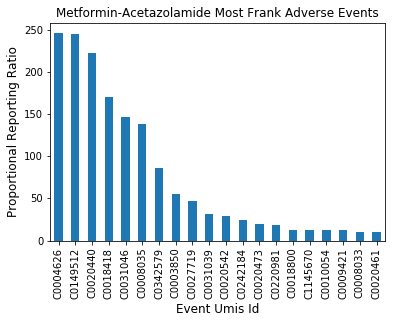

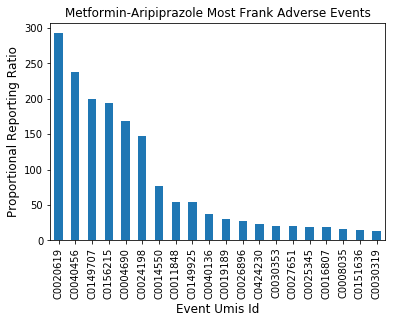

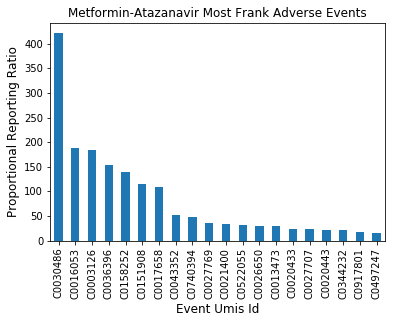

In [253]:
%matplotlib inline
for drug1 in lst_drug1_class:
    for drug2 in lst_drug2_class:
        
        if drug1 in dct_interact.keys():
            print('Drug1: ', drug1)
            if (drug2 in dct_interact[drug1].keys()):
                print('Drug2: ', drug2)
                print('Interaction: ', dct_interact[drug1][drug2][0])
                df_AE_drug1_drug2 = getdf_AE_drug1_drug2(drug1,drug2)
                if df_AE_drug1_drug2 is not None:
                    print(df_AE_drug1_drug2.head())

                    ax = df_AE_drug1_drug2[:20].plot(x='event_umls_id', kind='bar', title=drug1.title() + '-' + drug2.title() + ' Most Frank Adverse Events',legend=False)
                    ax.set_xlabel("Event Umis Id", fontsize=12)
                    ax.set_ylabel("Proportional Reporting Ratio", fontsize=12)
                #else:
             
            else:
                print(drug2 + ' has no reported interactions with ' + drug1 + '/verify validity of drug2 name') 
                
        else:
            print(drug1 + ' has not been found in database/verify validity of drug1 name')
        print('')  

In [240]:
twosides['event_name'].value_counts()[:10]

arterial pressure NOS decreased    28568
anaemia                            27006
Difficulty breathing               26037
nausea                             25190
neumonia                           24430
Fatigue                            24260
Pain                               23894
diarrhea                           23848
asthenia                           23515
emesis                             23043
Name: event_name, dtype: int64

In [ ]:
######                  New code                      ######

In [241]:
dct_AE = dict(zip(twosides['event_umls_id'], twosides['event_name']))

In [239]:
#Number of unique AE
len(dct_AE)

1318

In [254]:
###Offsides
from pandas import read_csv
offsides = read_csv('3003377s-offsides.tsv', delimiter="\t")
#print(twosides.describe())
offsides.head()

,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect
0,CID000000076,dehydroepiandrosterone,C0000737,abdominal pain,2.250000,1.169925,6.537095,6.156712e-07,9,4.000000,0.002849,0,0,0
1,CID000000076,dehydroepiandrosterone,C0001622,hyperadrenalism,11.000000,3.459432,4.782699,1.644408e-03,2,0.181818,0.000041,0,0,0
2,CID000000076,dehydroepiandrosterone,C0001623,adrenal insufficiency,2.200000,1.137504,4.315199,9.884952e-03,2,0.909091,0.002491,0,0,0
3,CID000000076,dehydroepiandrosterone,C0002792,anaphylactic reaction,2.588235,1.371969,4.590918,3.355380e-03,4,1.545455,0.000503,0,0,0
4,CID000000076,dehydroepiandrosterone,C0002940,aneurysm,7.333333,2.874469,4.598374,3.399457e-03,2,0.272727,0.000135,0,0,0


In [342]:
#Unique Drugs with AE from Offsides
lst_drugs_offsides = list(offsides['drug'].value_counts().index)

In [343]:
lst_drugs_offsides[:5]

['pamidronate',
 'zoledronic acid',
 'retinoic acid',
 'chlorhexidine gluconate',
 'ribavirin']

In [344]:
len(lst_drugs_offsides)

1332

In [385]:
#Unique Drugs from DrugBank
lst_drugs_drugbank=[]
for doc in coll.find():
    #print(doc['Drugname'])
    lst_drugs_drugbank.append(doc['Drugname'])

In [387]:
len(lst_drugs_drugbank)

8206

In [388]:
#Unique Drugs with interactions from DrugBank
lst_drugs_with_interaction_drugbank = list(interactions.keys())
lst_drugs_with_interaction_drugbank = [el.lower() for el in lst_drugs_with_interaction_drugbank]

In [389]:
lst_drugs_with_interaction_drugbank[:5]

['porfimer', 'phenmetrazine', 'zileuton', 'chloroprocaine', 'brompheniramine']

In [390]:
len(lst_drugs_with_interaction_drugbank)

1474

In [391]:
lst_intersection = set(lst_drugs_with_interaction_drugbank).intersection(lst_drugs_offsides)

In [392]:
len(lst_intersection)

731

In [393]:
#Extract off label side effects
def extract_AE_offsides(drug):
    if drug in list(set(offsides['drug'])):
    #if drug in lst_drugs_offsides:
        offsides_subset = offsides[offsides['drug']==drug]
        dct_drug_extract_offsides = dict(zip( offsides_subset['umls_id'], list(zip(offsides_subset['rr'].round(2), offsides_subset['pvalue'])) ))
        return dct_drug_extract_offsides
    else:
        #print(drug + ' has no reported AE in Offsides')
        return None

In [396]:
dct_drugs_interactions_AE={}
for drug in lst_drugs_with_interaction_drugbank:
    #print(extract_AE_offsides(drug))
    dct_drugs_interactions_AE[drug] = extract_AE_offsides(drug)

In [403]:
#list(dct_drugs_interactions_AE.values())[:4]
len([el for el in list(dct_drugs_interactions_AE.values()) if el != None])

731

In [489]:
#Get dict and df of DrugBank interactions 
df_DB = pd.DataFrame(columns=['drug1', 'drug2', 'description'])
dct_interact={}
for drug1_dbank in list(interactions.keys()):
    drug1 = drug1_dbank.lower()
    dct_drug1_interactions={}
    for dct_drug2_dbank in interactions[drug1_dbank]['drug-interaction']:
        if isinstance(dct_drug2_dbank, dict):
            #print(type(dct_drug2_dbank), dct_drug2_dbank)
            drug2_dbank = dct_drug2_dbank['name']
            drug2 = drug2_dbank.lower()
            description = dct_drug2_dbank['description']
            dct_drug1_interactions[drug2] = description 
            df_DB = df_DB.append({'drug1': drug1, 'drug2': drug2, 'description': description}, ignore_index=True)
    #print(drug1, dct_drug1_interactions)
    dct_interact[drug1] = dct_drug1_interactions

In [491]:
df_DB.head()

,drug1,drug2,description
0,porfimer,acitretin,Acitretin may increase the photosensitizing ac...
1,porfimer,adapalene,Adapalene may increase the photosensitizing ac...
2,porfimer,afatinib,Afatinib may increase the photosensitizing act...
3,porfimer,alitretinoin,Alitretinoin may increase the photosensitizing...
4,porfimer,aminolevulinic acid,Aminolevulinic acid may increase the photosens...


In [492]:
df_TS_unique = twosides[['drug1','drug2']].drop_duplicates()

In [493]:
df_TS_unique.head()

,drug1,drug2
0,carnitine,galactose
11,carnitine,calcium
26,carnitine,bupropion
73,carnitine,heparin
99,carnitine,thyroxine


In [494]:
df_DB_TS_outer = pd.merge(df_DB[['drug1','drug2']], df_TS_unique, how='outer', on=['drug1', 'drug2'])

In [495]:
df_DB_TS_outer.head()

,drug1,drug2
0,porfimer,acitretin
1,porfimer,adapalene
2,porfimer,afatinib
3,porfimer,alitretinoin
4,porfimer,aminolevulinic acid


In [496]:
len(df_DB_TS_outer)

154011

In [497]:
len(df_DB)

95478

In [498]:
len(df_TS_unique)

63473

In [564]:
def get_interaction(drug1, drug2):
    if drug1 in list(dct_interact.keys()):
        if drug2 in list(dct_interact[drug1].keys()):
            result = dct_interact[drug1][drug2]
            return result
        else:
            return None
            #print(drug1 + ' does not interact with ' + drug2)
    else:
        return None
        #print(drug1 + ' not in DrugBank')
    #return result

In [592]:
def get_ae(drug1, drug2):
    twosides_subset = twosides[(twosides['drug1'] == drug1) & (twosides['drug2'] == drug2) |
        (twosides['drug2'] == drug1) & (twosides['drug1'] == drug2)]
    if twosides_subset.empty:
        return None
    else:
        #twosides_subset = twosides_subset.sort_values('proportional_reporting_ratio', ascending=False)
        dct = dict(zip( twosides_subset['event_umls_id'], twosides_subset['proportional_reporting_ratio'].round(2) ))
        return dct
    #return result

In [582]:
len(df_DB_TS_outer)

154011

In [593]:
import time

t0 = time.clock()
dct_DB_TS_outer=dict()
#for i in range(0, len(df_DB_TS_outer)):
for i in range(0, 10):
    drug1 = df_DB_TS_outer.iloc[i]['drug1']
    drug2 = df_DB_TS_outer.iloc[i]['drug2']
    #print(drug1,drug2)
    #interaction = get_interaction(drug1, drug2)
    ae = get_ae(drug1,drug2)
    #dct_DB_TS_outer[(drug1,drug2)] = [interaction, ae]
dt = time.clock()-t0
print(dt)
    

13.099765999999363


In [585]:
dct_DB_TS_outer[('porfimer', 'adapalene')]

['Adapalene may increase the photosensitizing activities of Porfimer.', None]

In [567]:
dct_interact['porfimer']['adapalene']

'Adapalene may increase the photosensitizing activities of Porfimer.'

In [548]:
df_DB.head()

,drug1,drug2,description
0,porfimer,acitretin,Acitretin may increase the photosensitizing ac...
1,porfimer,adapalene,Adapalene may increase the photosensitizing ac...
2,porfimer,afatinib,Afatinib may increase the photosensitizing act...
3,porfimer,alitretinoin,Alitretinoin may increase the photosensitizing...
4,porfimer,aminolevulinic acid,Aminolevulinic acid may increase the photosens...


In [578]:
df_DB[(df_DB['drug1']=='porfimer') & (df_DB['drug2']=='adapalene')]

,drug1,drug2,description
1,porfimer,adapalene,Adapalene may increase the photosensitizing ac...


In [570]:
get_ae('porfimer', 'adapalene')

In [569]:
get_interaction('porfimer', 'adapalene')

'Adapalene may increase the photosensitizing activities of Porfimer.'

In [571]:
get_ae('metformin','asd')

In [572]:
get_interaction('metformin','acetazolamide')

'The risk or severity of adverse effects can be increased when Acetazolamide is combined with Metformin.'

In [573]:
get_ae('metformin','acetazolamide')

{'C0003850': 55.689999999999998,
 'C0004093': 2.2000000000000002,
 'C0004238': 6.8399999999999999,
 'C0004604': 5.3600000000000003,
 'C0004626': 245.53999999999999,
 'C0008031': 3.0800000000000001,
 'C0008033': 10.539999999999999,
 'C0008035': 138.18000000000001,
 'C0009421': 12.359999999999999,
 'C0009676': 4.6900000000000004,
 'C0010054': 12.91,
 'C0013404': 7.0700000000000003,
 'C0018418': 170.13,
 'C0018799': 7.1900000000000004,
 'C0018800': 13.01,
 'C0018802': 2.3300000000000001,
 'C0020440': 222.46000000000001,
 'C0020461': 10.42,
 'C0020473': 19.59,
 'C0020542': 28.850000000000001,
 'C0020649': 1.95,
 'C0022660': 3.3900000000000001,
 'C0027051': 1.5700000000000001,
 'C0027719': 46.479999999999997,
 'C0031039': 31.27,
 'C0031046': 145.99000000000001,
 'C0032227': 8.4399999999999995,
 'C0039070': 8.9000000000000004,
 'C0040822': 4.2300000000000004,
 'C0042029': 7.4699999999999998,
 'C0149512': 245.38999999999999,
 'C0220981': 18.18,
 'C0242184': 24.359999999999999,
 'C0342579': 85

In [574]:
get_interaction('metformin','acetylsalicylic acid')

'Acetylsalicylic acid may increase the hypoglycemic activities of Metformin.'

In [575]:
get_ae('metformin','acetylsalicylic acid')

In [576]:
get_ae('metformin','metformin')

In [577]:
get_interaction('metformin','metformin')

In [ ]:
import checkdb 
checkdb.get_ae('metformin','acetazolamide')
checkdb.get_interaction('metformin','acetazolamide')